In [1]:
# Import nessaccery libraries 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.metrics
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import classification_report, f1_score, roc_auc_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Data Acquisition

In [2]:
# Load dataset  
df = pd.read_csv('D:\Retail scoring.csv')

# Data Exploration

In [3]:
# Display the first few rows of the dataset
df.head()

,loan_ID,AGE,VELTI_Gender_Code,VELTI_Gender_Desc,VELTI_Marital_Status_Code,VELTI_Marital_Status_Eng_Desc,no_of_Dependents,VELTI_Education_Level_Code,VELTI_Education_Level_Desc,VELTI_Governorate_Code,...,Requested_Amount,VELTI_Customer_Program_Type_Code,VELTI_Customer_Program_Type_Desc,VELTI_Product_Type_Category_Code,VELTI_Product_Type_Category_Desc,VELTI_Product_Type_Code,VELTI_Product_Type_Eng_Desc,Requested_Loan_Duration,VELTI_Process_Status_Code,VELTI_Process_Status_Desc
0,661771,26,2.0,Female,3.0,Married,NaN,5.0,University degree,11.0,...,103500.0,31.0,Wadi Degla Income Proof,1,Cash Loans,15946,Personal Loans-15%,60,125,Consumer - Archiving
1,661772,27,2.0,Female,3.0,Married,NaN,5.0,University degree,6.0,...,164200.0,31.0,Wadi Degla Income Proof,1,Cash Loans,15946,Personal Loans-15%,60,125,Consumer - Archiving
2,661773,43,2.0,Female,3.0,Married,NaN,5.0,University degree,11.0,...,204000.0,31.0,Wadi Degla Income Proof,1,Cash Loans,15946,Personal Loans-15%,60,125,Consumer - Archiving
3,661774,29,1.0,Male,4.0,Single,NaN,5.0,University degree,16.0,...,115000.0,31.0,Wadi Degla Income Proof,1,Cash Loans,15946,Personal Loans-15%,72,116,Consumer - Inform Customer on Loan Account Number
4,661778,23,2.0,Female,1.0,Not Given,NaN,5.0,University degree,6.0,...,114400.0,31.0,Wadi Degla Income Proof,1,Cash Loans,15946,Personal Loans-15%,48,125,Consumer - Archiving


In [4]:
# Display the last few rows of the dataset
df.tail()

,loan_ID,AGE,VELTI_Gender_Code,VELTI_Gender_Desc,VELTI_Marital_Status_Code,VELTI_Marital_Status_Eng_Desc,no_of_Dependents,VELTI_Education_Level_Code,VELTI_Education_Level_Desc,VELTI_Governorate_Code,...,Requested_Amount,VELTI_Customer_Program_Type_Code,VELTI_Customer_Program_Type_Desc,VELTI_Product_Type_Category_Code,VELTI_Product_Type_Category_Desc,VELTI_Product_Type_Code,VELTI_Product_Type_Eng_Desc,Requested_Loan_Duration,VELTI_Process_Status_Code,VELTI_Process_Status_Desc
31972,761157,45,1.0,Male,3.0,Married,NaN,5.0,University degree,11.0,...,1100000.0,108.0,Compound ownership income surrogate,1,Cash Loans,15946,Personal Loans-15%,36,105,Consumer - First Approval Level
31973,761165,48,1.0,Male,3.0,Married,NaN,5.0,University degree,11.0,...,140000.0,0.0,Default Program,1,Cash Loans,15946,Personal Loans-15%,24,105,Consumer - First Approval Level
31974,761167,57,1.0,Male,3.0,Married,NaN,5.0,University degree,23.0,...,350000.0,12.0,Top UP Pensions,1,Cash Loans,15946,Personal Loans-15%,84,105,Consumer - First Approval Level
31975,761169,23,1.0,Male,3.0,Married,NaN,5.0,University degree,11.0,...,43000.0,107.0,PL to Card income surrogate,1,Cash Loans,15946,Personal Loans-15%,30,105,Consumer - First Approval Level
31976,761172,32,1.0,Male,3.0,Married,NaN,5.0,University degree,11.0,...,275000.0,10.0,Top Up,1,Cash Loans,15946,Personal Loans-15%,144,105,Consumer - First Approval Level


In [5]:
# Count of columns , rows of dataset
df.shape

(31977, 31)

In [6]:
# Summary of the dataset: rows, columns, data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31977 entries, 0 to 31976
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   loan_ID                           31977 non-null  int64  
 1   AGE                               31977 non-null  int64  
 2   VELTI_Gender_Code                 31837 non-null  float64
 3   VELTI_Gender_Desc                 31837 non-null  object 
 4   VELTI_Marital_Status_Code         31836 non-null  float64
 5   VELTI_Marital_Status_Eng_Desc     31837 non-null  object 
 6   no_of_Dependents                  0 non-null      float64
 7   VELTI_Education_Level_Code        31836 non-null  float64
 8   VELTI_Education_Level_Desc        31837 non-null  object 
 9   VELTI_Governorate_Code            31835 non-null  float64
 10  VELTI_Governorate_Eng_Desc        31837 non-null  object 
 11  VELTI_EmploymentType_Code         31455 non-null  float64
 12  VELT

In [7]:
# Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_ID,31977.0,709289.141602,2.854105e+04,661771.0,684686.00,708456.00,733078.00,761172.0
AGE,31977.0,41.775589,1.032909e+01,0.0,34.00,41.00,49.00,87.0
VELTI_Gender_Code,31837.0,2.074285,4.193970e+01,1.0,1.00,1.00,1.00,2077.0
VELTI_Marital_Status_Code,31836.0,3.728735,4.477623e+00,1.0,3.00,3.00,3.00,31.0
no_of_Dependents,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VELTI_Education_Level_Code,31836.0,4.947135,3.861929e-01,1.0,5.00,5.00,5.00,6.0
VELTI_Governorate_Code,31835.0,9.263672,6.107497e+00,1.0,6.00,6.00,11.00,30.0
VELTI_EmploymentType_Code,31455.0,1.317914,7.147506e-01,1.0,1.00,1.00,1.00,5.0
Employment_Length,31977.0,2.858805,5.941035e+00,0.0,0.00,0.00,3.00,73.0
Monthly_income,31836.0,47567.856117,2.081375e+05,0.0,0.00,5226.00,29000.00,20062300.0


In [8]:
# Statistical summary of categorical columns
df.describe(include= 'object').T

,count,unique,top,freq
VELTI_Gender_Desc,31837,3,Male,24610
VELTI_Marital_Status_Eng_Desc,31837,9,Married,27180
VELTI_Education_Level_Desc,31837,7,University degree,30513
VELTI_Governorate_Eng_Desc,31837,31,Cairo,14377
VELTI_EmploymentType_Desc,31455,5,Salaried,24457
Empl_Job_Title,18141,3185,PR,2631
VELTI_Customer_Program_Type_Desc,31837,42,Default Program,5884
VELTI_Product_Type_Category_Desc,31977,1,Cash Loans,31977
VELTI_Product_Type_Eng_Desc,31977,3,Personal Loans-15%,29729
VELTI_Process_Status_Desc,31977,14,Consumer - Inform Customer for Rejection,19522


In [9]:
# Count of unique values in each column
df.nunique()

loan_ID                             31956
AGE                                    67
VELTI_Gender_Code                       3
VELTI_Gender_Desc                       3
VELTI_Marital_Status_Code               8
VELTI_Marital_Status_Eng_Desc           9
no_of_Dependents                        0
VELTI_Education_Level_Code              6
VELTI_Education_Level_Desc              7
VELTI_Governorate_Code                 30
VELTI_Governorate_Eng_Desc             31
VELTI_EmploymentType_Code               5
VELTI_EmploymentType_Desc               5
Employment_Length                      46
Empl_Job_Title                       3185
Monthly_income                      10018
Income_Type                             0
Total_Debt                          12432
Debt_to_Income_Ratio                 3856
Home_Ownership_Status                   0
Credit_History                          0
Requested_Amount                     1939
VELTI_Customer_Program_Type_Code       42
VELTI_Customer_Program_Type_Desc  

In [10]:
#Check Values of each column
for column in df:
    print(column,":\n",df[column].unique(),'\n')

loan_ID :
 [661771 661772 661773 ... 761167 761169 761172] 

AGE :
 [26 27 43 29 23 32 37 41 30 34 45 25 55 31 33 44 40 35 48 42 28 39 36 49
 56 57 54 52 60 59 50 58 62 64 51 47 46 53 38 24 68 61  0 63 66 79 65 70
 78 22 21 74 69 12 72 73 80 77 71 75 86 67 76 81 83 87 17] 

VELTI_Gender_Code :
 [2.000e+00 1.000e+00 2.077e+03       nan] 

VELTI_Gender_Desc :
 ['Female' 'Male' 'Unknown' nan] 

VELTI_Marital_Status_Code :
 [ 3.  4.  1.  2.  5. 29. 30. 31. nan] 

VELTI_Marital_Status_Eng_Desc :
 ['Married' 'Single' 'Not Given' 'Divorced' 'Widow' 'Defacto'
 'Living Apart' 'Never Married' nan 'Not Available'] 

no_of_Dependents :
 [nan] 

VELTI_Education_Level_Code :
 [ 5.  4.  6.  2. nan  1.  3.] 

VELTI_Education_Level_Desc :
 ['University degree' 'Diploma' "Masters' degree" 'Primary' nan
 'No Applicable' 'Secondary' 'Not Available'] 

VELTI_Governorate_Code :
 [11.  6. 16. 20.  1. 10. 15.  5.  7. 23. 12. 19. 24. 25. 13.  3.  4.  9.
 29. 26.  8.  2. nan 21. 28. 22. 27. 14. 18. 17. 30.] 

V

In [11]:
# Check for duplicated rows
df.duplicated().sum()

17

In [12]:
# Count of missing values in each column
df.isnull().sum()

loan_ID                                 0
AGE                                     0
VELTI_Gender_Code                     140
VELTI_Gender_Desc                     140
VELTI_Marital_Status_Code             141
VELTI_Marital_Status_Eng_Desc         140
no_of_Dependents                    31977
VELTI_Education_Level_Code            141
VELTI_Education_Level_Desc            140
VELTI_Governorate_Code                142
VELTI_Governorate_Eng_Desc            140
VELTI_EmploymentType_Code             522
VELTI_EmploymentType_Desc             522
Employment_Length                       0
Empl_Job_Title                      13836
Monthly_income                        141
Income_Type                         31977
Total_Debt                          17400
Debt_to_Income_Ratio                20636
Home_Ownership_Status               31977
Credit_History                      31977
Requested_Amount                       44
VELTI_Customer_Program_Type_Code      140
VELTI_Customer_Program_Type_Desc  

# Data Preparation and Preprocessing

In [13]:
# Copy data to make Data Preparation and Preprocessing
df_P = df.copy()

## Handling Duplicates

In [14]:
# Remove duplicates based on all columns
df_P.drop_duplicates(inplace=True)

## Deleting Unnecessary Columns

In [15]:
# Drop unnessaccery columns 
df_P.drop('loan_ID', axis=1, inplace=True)
df_P.drop('no_of_Dependents', axis=1, inplace=True)
df_P.drop('VELTI_Gender_Code', axis=1, inplace=True)
df_P.drop('VELTI_Marital_Status_Code', axis=1, inplace=True)
df_P.drop('VELTI_Education_Level_Code', axis=1, inplace=True)
df_P.drop('VELTI_Governorate_Code', axis=1, inplace=True)
df_P.drop('VELTI_EmploymentType_Code', axis=1, inplace=True)
df_P.drop('Empl_Job_Title', axis=1, inplace=True)
df_P.drop('VELTI_Customer_Program_Type_Code', axis=1, inplace=True)
df_P.drop('VELTI_Product_Type_Category_Code', axis=1, inplace=True)
df_P.drop('VELTI_Product_Type_Category_Desc', axis=1, inplace=True)
df_P.drop('VELTI_Product_Type_Code', axis=1, inplace=True)
df_P.drop('VELTI_Process_Status_Code', axis=1, inplace=True)
df_P.drop('Income_Type', axis=1, inplace=True)
df_P.drop('Home_Ownership_Status', axis=1, inplace=True)
df_P.drop('Credit_History', axis=1, inplace=True)

In [16]:
# Check data after dropping columns
df_P.head(10)

,AGE,VELTI_Gender_Desc,VELTI_Marital_Status_Eng_Desc,VELTI_Education_Level_Desc,VELTI_Governorate_Eng_Desc,VELTI_EmploymentType_Desc,Employment_Length,Monthly_income,Total_Debt,Debt_to_Income_Ratio,Requested_Amount,VELTI_Customer_Program_Type_Desc,VELTI_Product_Type_Eng_Desc,Requested_Loan_Duration,VELTI_Process_Status_Desc
0,26,Female,Married,University degree,Giza,Salaried,3,12000.0,2888.06,24.07,103500.0,Wadi Degla Income Proof,Personal Loans-15%,60,Consumer - Archiving
1,27,Female,Married,University degree,Cairo,Salaried,3,25000.0,5031.83,20.13,164200.0,Wadi Degla Income Proof,Personal Loans-15%,60,Consumer - Archiving
2,43,Female,Married,University degree,Giza,Salaried,3,40000.0,5692.40,14.23,204000.0,Wadi Degla Income Proof,Personal Loans-15%,60,Consumer - Archiving
3,29,Male,Single,University degree,Monufia,Salaried,3,23000.0,3027.59,13.16,115000.0,Wadi Degla Income Proof,Personal Loans-15%,72,Consumer - Inform Customer on Loan Account Number
4,23,Female,Not Given,University degree,Cairo,Salaried,3,29000.0,4873.10,16.80,114400.0,Wadi Degla Income Proof,Personal Loans-15%,48,Consumer - Archiving
5,32,Male,Married,University degree,Cairo,Salaried,0,35000.0,11758.08,33.59,174100.0,Wadi Degla Income Proof,Personal Loans-15%,24,Consumer - Inform Customer for Rejection
6,37,Male,Married,University degree,Cairo,Salaried,3,20000.0,4492.21,22.46,114400.0,Wadi Degla Income Proof,Personal Loans-15%,60,Consumer - Archiving
7,41,Male,Single,University degree,Qalyubia,Salaried,16,35000.0,17918.20,0.00,175000.0,Wadi Degla Income Proof,Personal Loans-15%,72,Consumer - Inform Customer for Rejection
8,30,Female,Married,University degree,Cairo,Salaried,3,25000.0,4581.83,18.33,164200.0,Wadi Degla Income Proof,Personal Loans-15%,60,Consumer - Archiving
9,37,Male,Not Given,University degree,Alexandria,Salaried,3,35300.0,14020.20,39.72,175000.0,Wadi Degla Income Proof,Personal Loans-15%,72,Consumer - Archiving


## Creating a new column as a target

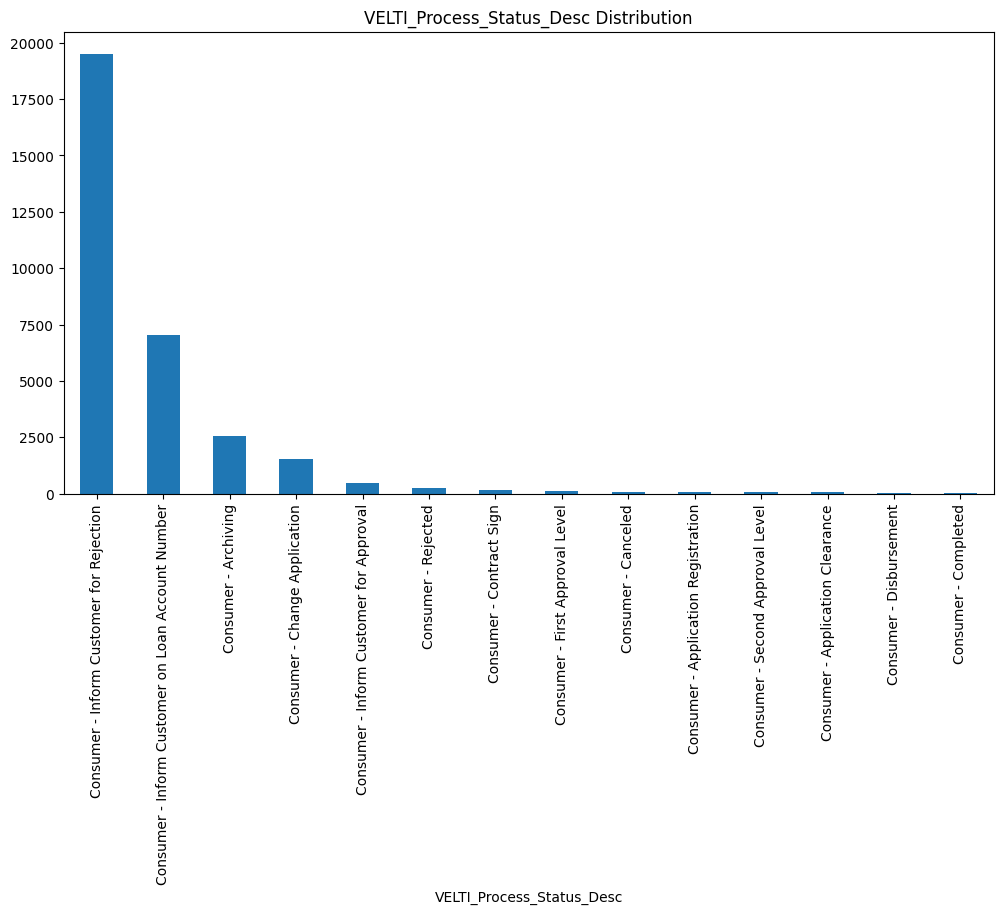

In [17]:
# Check VELTI_Process_Status_Desc column distribution
plt.figure(figsize=(12,6))
df_P.VELTI_Process_Status_Desc.value_counts().plot.bar()
plt.title('VELTI_Process_Status_Desc Distribution');

In [18]:
# Check values of VELTI_Process_Status_Desc column
df_P.VELTI_Process_Status_Desc.value_counts()

VELTI_Process_Status_Desc
Consumer - Inform Customer for Rejection             19520
Consumer - Inform Customer on Loan Account Number     7015
Consumer - Archiving                                  2569
Consumer - Change Application                         1536
Consumer - Inform Customer for Approval                491
Consumer - Rejected                                    256
Consumer - Contract Sign                               139
Consumer - First Approval Level                        120
Consumer - Canceled                                     75
Consumer - Application Registration                     73
Consumer - Second Approval Level                        60
Consumer - Application Clearance                        59
Consumer - Disbursement                                 30
Consumer - Completed                                    17
Name: count, dtype: int64

In [19]:
# Replace values of of VELTI_Process_Status_Desc column with `Rejected` and `Approved` to create target column 
df_P.replace(to_replace='Consumer - Inform Customer for Rejection', value='Rejected', inplace=True)
df_P.replace(to_replace='Consumer - Rejected', value='Rejected', inplace=True)
df_P.replace(to_replace='Consumer - Inform Customer on Loan Account Number', value='Approved', inplace=True)
df_P.replace(to_replace='Consumer - Completed', value='Approved', inplace=True)
df_P.replace(to_replace='Consumer - Disbursement', value='Approved', inplace=True)

In [20]:
df_P.VELTI_Process_Status_Desc.value_counts()

VELTI_Process_Status_Desc
Rejected                                   19776
Approved                                    7062
Consumer - Archiving                        2569
Consumer - Change Application               1536
Consumer - Inform Customer for Approval      491
Consumer - Contract Sign                     139
Consumer - First Approval Level              120
Consumer - Canceled                           75
Consumer - Application Registration           73
Consumer - Second Approval Level              60
Consumer - Application Clearance              59
Name: count, dtype: int64

In [21]:
# Selecting Rejected and Approved Rows.
# For this example we are going to predict only 2 outputs, `Rejected` and `Approved`
df_P = df_P.loc[df_P['VELTI_Process_Status_Desc'].isin(['Rejected', 'Approved'])]
df_P.shape

(26838, 15)

In [22]:
# Creating a new column for `Rejected` and `Approved` with values 0 or 1 depending of the column `loan_status`
df_P['Loan_Status'] = df_P.VELTI_Process_Status_Desc.map({'Rejected': 0, 'Approved': 1})
df_P[['VELTI_Process_Status_Desc', 'Loan_Status']].head(10)

,VELTI_Process_Status_Desc,Loan_Status
3,Approved,1
5,Rejected,0
7,Rejected,0
11,Rejected,0
13,Approved,1
18,Approved,1
22,Approved,1
23,Rejected,0
28,Rejected,0
29,Rejected,0


In [23]:
# Drop `VELTI_Process_Status_Desc` column 
df_P.drop('VELTI_Process_Status_Desc', axis=1, inplace=True)

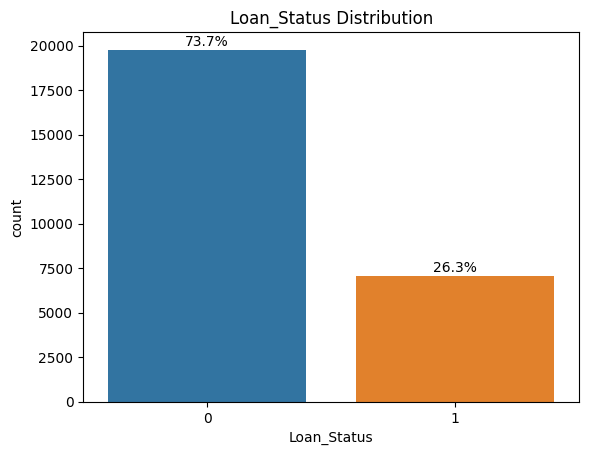

In [24]:
# Check for balance between `Rejected` and `Approved` after creating `loan_status` column 
ax = sns.countplot(data = df_P, x = 'Loan_Status')
total = len(df_P)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%\n'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center')

plt.title('Loan_Status Distribution')
plt.show()

In [25]:
# Reset index of data after dropping many columns 
df_P = df_P.reset_index(drop=True)
df_P

,AGE,VELTI_Gender_Desc,VELTI_Marital_Status_Eng_Desc,VELTI_Education_Level_Desc,VELTI_Governorate_Eng_Desc,VELTI_EmploymentType_Desc,Employment_Length,Monthly_income,Total_Debt,Debt_to_Income_Ratio,Requested_Amount,VELTI_Customer_Program_Type_Desc,VELTI_Product_Type_Eng_Desc,Requested_Loan_Duration,Loan_Status
0,29,Male,Single,University degree,Monufia,Salaried,3,23000.0,3027.59,13.16,115000.0,Wadi Degla Income Proof,Personal Loans-15%,72,1
1,32,Male,Married,University degree,Cairo,Salaried,0,35000.0,11758.08,33.59,174100.0,Wadi Degla Income Proof,Personal Loans-15%,24,0
2,41,Male,Single,University degree,Qalyubia,Salaried,16,35000.0,17918.20,0.00,175000.0,Wadi Degla Income Proof,Personal Loans-15%,72,0
3,34,Female,Married,University degree,Cairo,Salaried,0,35000.0,4698.10,13.42,114400.0,Wadi Degla Income Proof,Personal Loans-15%,48,0
4,30,Female,Married,University degree,Giza,Salaried,3,29500.0,4392.21,14.89,114400.0,Wadi Degla Income Proof,Personal Loans-15%,60,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26833,37,Male,Married,University degree,Cairo,Salaried,0,0.0,NaN,NaN,100000.0,Wadi Degla Income Proof,Personal Loans-15%,60,0
26834,26,Male,Married,University degree,Cairo,Salaried,0,0.0,NaN,NaN,155000.0,Wadi Degla Income Proof,Personal Loans-15%,72,0
26835,29,Female,Married,University degree,Cairo,Salaried,0,0.0,NaN,NaN,154200.0,Wadi Degla Income Proof,Personal Loans-15%,48,0
26836,37,Male,Married,University degree,Alexandria,Salaried,0,36000.0,NaN,NaN,155000.0,Wadi Degla Income Proof,Personal Loans-15%,72,0


## Handling missing values and errors in other columns

In [26]:
# Count of missing values in each column after creating `loan_status` column
df_P.isnull().sum()

AGE                                     0
VELTI_Gender_Desc                       0
VELTI_Marital_Status_Eng_Desc           0
VELTI_Education_Level_Desc              0
VELTI_Governorate_Eng_Desc              0
VELTI_EmploymentType_Desc             472
Employment_Length                       0
Monthly_income                          0
Total_Debt                          15684
Debt_to_Income_Ratio                18812
Requested_Amount                        0
VELTI_Customer_Program_Type_Desc        0
VELTI_Product_Type_Eng_Desc             0
Requested_Loan_Duration                 0
Loan_Status                             0
dtype: int64

In [27]:
# Values of each column after creating `loan_status` column
for column in df_P:
    print(column,":\n",df_P[column].unique(),'\n')

AGE :
 [29 32 41 34 30 33 40 35 42 28 39 43 36 49 56 26 57 54 52 60 50 55 58 62
 59 51 47 31 44 37 46 48 53 38 25 27 45 68 64 23 63 61 24 66 79 65 70 78
 22 74 69 12 21 72 73 80 77 71 75 86 67 76 81 87 17] 

VELTI_Gender_Desc :
 ['Male' 'Female' 'Unknown'] 

VELTI_Marital_Status_Eng_Desc :
 ['Single' 'Married' 'Widow' 'Not Given' 'Divorced' 'Defacto'
 'Living Apart' 'Never Married'] 

VELTI_Education_Level_Desc :
 ['University degree' 'Diploma' "Masters' degree" 'Primary' 'No Applicable'
 'Secondary'] 

VELTI_Governorate_Eng_Desc :
 ['Monufia' 'Cairo' 'Qalyubia' 'Giza' 'Alexandria' 'Minya' 'Beni Suef'
 'Dakahlia' 'Al Sharqia' 'Ismailia' 'Port Said' 'Sohag' 'Kafr el-Sheikh'
 'Gharbia' 'Asyut' 'Beheira' 'Faiyum' 'Suez' '6th of October' 'Aswan'
 'Qena' 'Helwan' 'Red Sea' 'Damietta' 'Luxor' 'South Sinai' 'Matruh'
 'North Sinai' 'New Valley' 'Outside Egypt'] 

VELTI_EmploymentType_Desc :
 ['Salaried' 'Pensioner' 'Self-employed' nan 'Others' 'Professional'] 

Employment_Length :
 [ 3  0 16 1

In [28]:
# Check VELTI_Gender_Desc column
df_P.VELTI_Gender_Desc.value_counts()

VELTI_Gender_Desc
Male       21015
Female      5812
Unknown       11
Name: count, dtype: int64

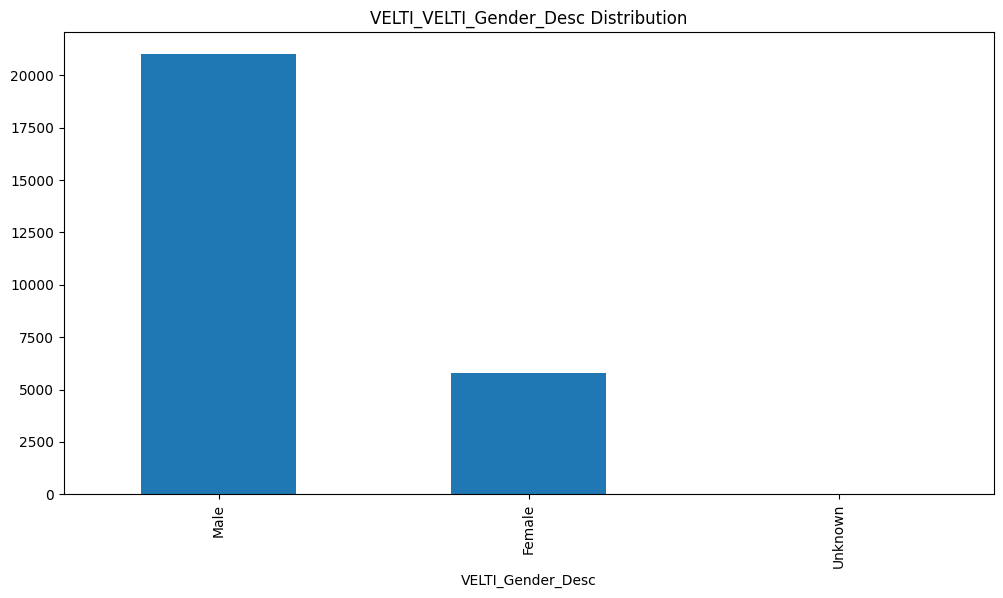

In [29]:
# Check VELTI_VELTI_Gender_Desc column distribution
plt.figure(figsize=(12,6))
df_P.VELTI_Gender_Desc.value_counts().plot.bar()
plt.title('VELTI_VELTI_Gender_Desc Distribution');

In [30]:
# Drop Unknown by replace with Not Given Because it be a reason to reject Loan Application 
df_P.replace(to_replace='Unknown', value='Not Given', inplace=True)

In [31]:
# Check VELTI_Gender_Desc column after after replace values 
df_P.VELTI_Gender_Desc.value_counts()

VELTI_Gender_Desc
Male         21015
Female        5812
Not Given       11
Name: count, dtype: int64

In [32]:
# Check VELTI_Marital_Status_Eng_Desc column
df_P.VELTI_Marital_Status_Eng_Desc.value_counts()

VELTI_Marital_Status_Eng_Desc
Married          22902
Not Given         1217
Single            1157
Defacto            429
Widow              414
Divorced           364
Never Married      198
Living Apart       157
Name: count, dtype: int64

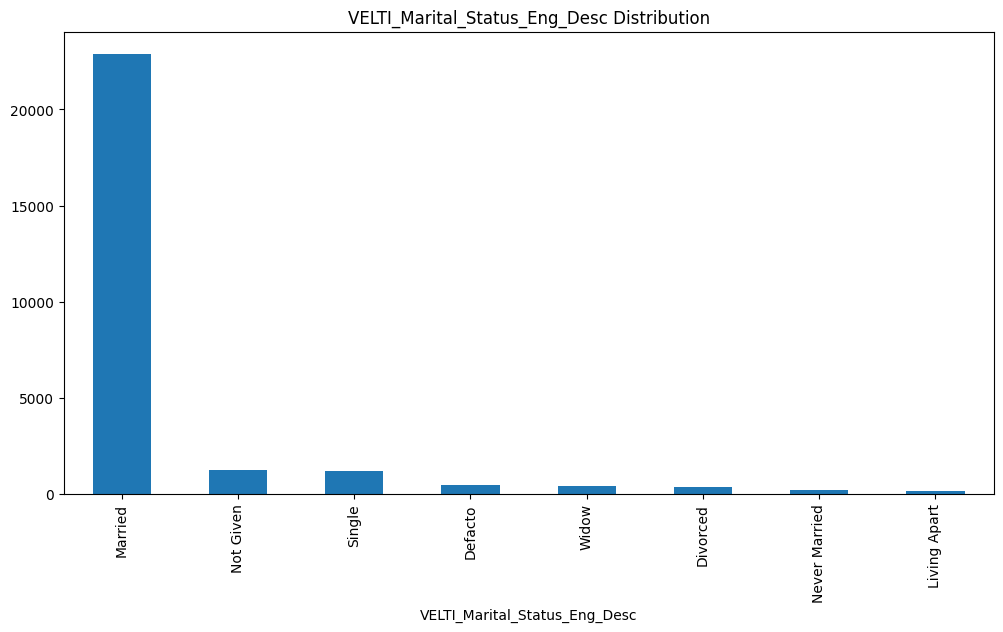

In [33]:
# Check VELTI_VELTI_Gender_Desc column distribution
plt.figure(figsize=(12,6))
df_P.VELTI_Marital_Status_Eng_Desc.value_counts().plot.bar()
plt.title('VELTI_Marital_Status_Eng_Desc Distribution');

In [34]:
# Replace Never Married with Sinlge Because Never Married means that person is sinlge 
df_P.replace(to_replace='Never Married', value='Single', inplace=True)

In [35]:
# Replace Living Apart with Sinlge Because Living Apart means that person is sinlge too
df_P.replace(to_replace='Living Apart', value='Single', inplace=True)

In [36]:
# Replace Defacto with Sinlge Because Defacto means that person is sinlge too
df_P.replace(to_replace='Defacto', value='Single', inplace=True)

In [37]:
# Check VELTI_Marital_Status_Eng_Desc column after replace values 
df_P.VELTI_Marital_Status_Eng_Desc.value_counts()

VELTI_Marital_Status_Eng_Desc
Married      22902
Single        1941
Not Given     1217
Widow          414
Divorced       364
Name: count, dtype: int64

In [38]:
# Check VELTI_EmploymentType_Desc column
df_P.VELTI_EmploymentType_Desc.value_counts()

VELTI_EmploymentType_Desc
Salaried         20610
Self-employed     4684
Pensioner          925
Others              99
Professional        48
Name: count, dtype: int64

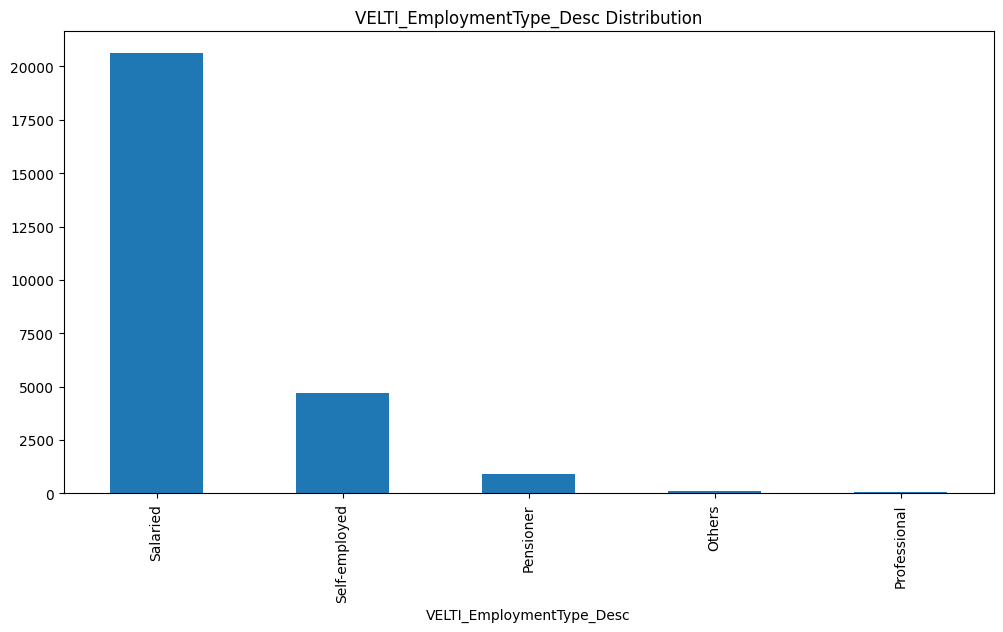

In [39]:
# Check VELTI_EmploymentType_Desc column distribution
plt.figure(figsize=(12,6))
df_P.VELTI_EmploymentType_Desc.value_counts().plot.bar()
plt.title('VELTI_EmploymentType_Desc Distribution');

In [40]:
# Replace NaN values with Not Given in the VELTI_EmploymentType_Desc column 
df_P['VELTI_EmploymentType_Desc'] = df_P['VELTI_EmploymentType_Desc'].fillna('Not Given')

In [41]:
# Replace NaN values with 0 in the Total_Debt 
df_P['Total_Debt'] = df_P['Total_Debt'].fillna(0)

In [42]:
# Convert Monthly_income Column from float to int
df_P['Monthly_income'] = df_P['Monthly_income'].astype('int64')

In [43]:
# Convert Total_Debt Column from float to int
df_P['Total_Debt'] = df_P['Total_Debt'].astype('int64')

In [44]:
# Convert Requested_Amount Column from float to int
df_P['Requested_Amount'] = df_P['Requested_Amount'].astype('int64')

In [45]:
# check type of Monthly_income Column, Total_Debt Column and Requested_Amount Column after changing them types
df_P.dtypes

AGE                                   int64
VELTI_Gender_Desc                    object
VELTI_Marital_Status_Eng_Desc        object
VELTI_Education_Level_Desc           object
VELTI_Governorate_Eng_Desc           object
VELTI_EmploymentType_Desc            object
Employment_Length                     int64
Monthly_income                        int64
Total_Debt                            int64
Debt_to_Income_Ratio                float64
Requested_Amount                      int64
VELTI_Customer_Program_Type_Desc     object
VELTI_Product_Type_Eng_Desc          object
Requested_Loan_Duration               int64
Loan_Status                           int64
dtype: object

In [46]:
# Loop through each row to calculate Debt to Income Ratio and update if the existing value is null
for index, row in df_P.iterrows():
    if pd.isnull(row['Debt_to_Income_Ratio']) and row['Monthly_income'] != 0:  # Avoid division by zero
        df_P.at[index, 'Debt_to_Income_Ratio'] = round(row['Total_Debt'] / row['Monthly_income']*100, 2)

In [47]:
# Replace NaN values with 0 in the Debt_to_Income_Ratio
df_P['Debt_to_Income_Ratio'] = df_P['Debt_to_Income_Ratio'].fillna(0)

In [48]:
# Check for missing values after Replace NaN values with 0 in the Total_Debt and Debt_to_Income_Ratio
df_P.isnull().sum()

AGE                                 0
VELTI_Gender_Desc                   0
VELTI_Marital_Status_Eng_Desc       0
VELTI_Education_Level_Desc          0
VELTI_Governorate_Eng_Desc          0
VELTI_EmploymentType_Desc           0
Employment_Length                   0
Monthly_income                      0
Total_Debt                          0
Debt_to_Income_Ratio                0
Requested_Amount                    0
VELTI_Customer_Program_Type_Desc    0
VELTI_Product_Type_Eng_Desc         0
Requested_Loan_Duration             0
Loan_Status                         0
dtype: int64

## Data bucketing

In [49]:
# Conditions for categorizing Debt_to_Income_Ratio
conditions = [
    (df_P['Debt_to_Income_Ratio'] <= 20),
    (df_P['Debt_to_Income_Ratio'] > 20) & (df_P['Debt_to_Income_Ratio'] < 49.99),
    (df_P['Debt_to_Income_Ratio'] >= 50)
]

# Labels for the buckets
bucket_labels = ['Low', 'Mid', 'High']

# Creating a new column for the buckets
df_P['Debt_to_Income_Ratio_Buckets'] = pd.cut(df_P['Debt_to_Income_Ratio'], bins=[-float('inf'), 20, 49.99, float('inf')], labels=bucket_labels, right=False)

# Counting the number of occurrences in each bucket
debt_to_income_ratio_buckets_counts = df_P['Debt_to_Income_Ratio_Buckets'].value_counts()

print(debt_to_income_ratio_buckets_counts)

Debt_to_Income_Ratio_Buckets
Low     18555
Mid      5952
High     2331
Name: count, dtype: int64


In [50]:
# Drop Debt_to_Income_Ratio column after creating a new column
df_P.drop('Debt_to_Income_Ratio', axis=1, inplace=True)

In [51]:
# Conditions for categorizing Employment_Length
conditions = [
    (df_P['Employment_Length'] == 0),
    (df_P['Employment_Length'] >= 1) & (df_P['Employment_Length'] <= 5),
    (df_P['Employment_Length'] >= 6) & (df_P['Employment_Length'] <= 10),
    (df_P['Employment_Length'] >= 11) & (df_P['Employment_Length'] <= 15),
    (df_P['Employment_Length'] >= 16) & (df_P['Employment_Length'] <= 20),
    (df_P['Employment_Length'] >= 21)
]

# Labels for the buckets
bucket_labels = ['0 years', '1-5 years', '6-10 years', '11-15 years', '16-20 years', '21+ years']

# Creating a new column for the buckets
df_P['Employment_Length_Buckets'] = pd.cut(df_P['Employment_Length'], bins=[-1, 0, 5, 10, 15, 20, float('inf')], labels=bucket_labels, right=True)

# Counting the number of occurrences in each bucket
employment_length_buckets_counts = df_P['Employment_Length_Buckets'].value_counts()

print(employment_length_buckets_counts)

Employment_Length_Buckets
0 years        15690
1-5 years       8611
21+ years       1600
6-10 years       557
11-15 years      246
16-20 years      134
Name: count, dtype: int64


In [52]:
# Drop Employment_Length column after creating a new column
df_P.drop('Employment_Length', axis=1, inplace=True)

In [53]:
# Calculate quantiles for Monthly_income
quantiles = df_P['Monthly_income'].quantile([0.25, 0.5, 0.75])

# Conditions for categorizing Monthly_income
conditions = [
    (df_P['Monthly_income'] <= quantiles[0.25]),
    (df_P['Monthly_income'] > quantiles[0.25]) & (df_P['Monthly_income'] <= quantiles[0.5]),
    (df_P['Monthly_income'] > quantiles[0.5]) & (df_P['Monthly_income'] <= quantiles[0.75]),
    (df_P['Monthly_income'] > quantiles[0.75])
]

# Labels for the buckets
bucket_labels = ['Low Income', 'Medium Income', 'Moderately High Income', 'High Income']

# Creating a new column for the buckets
df_P['Monthly_Income_Buckets'] = pd.cut(df_P['Monthly_income'], bins=[-float('inf')] + quantiles.tolist() + [float('inf')], labels=bucket_labels, right=True)

# Counting the number of occurrences in each bucket
monthly_income_buckets_counts = df_P['Monthly_Income_Buckets'].value_counts()

print(monthly_income_buckets_counts)

Monthly_Income_Buckets
Low Income                11059
Moderately High Income     6979
High Income                6439
Medium Income              2361
Name: count, dtype: int64


In [54]:
# Drop Monthly_income column after creating a new column
df_P.drop('Monthly_income', axis=1, inplace=True)

In [55]:
# Count of columns , rows of data after Data preprocessing
df_P.shape

(26838, 15)

In [56]:
# Check data after Data preprocessing
df_P

,AGE,VELTI_Gender_Desc,VELTI_Marital_Status_Eng_Desc,VELTI_Education_Level_Desc,VELTI_Governorate_Eng_Desc,VELTI_EmploymentType_Desc,Total_Debt,Requested_Amount,VELTI_Customer_Program_Type_Desc,VELTI_Product_Type_Eng_Desc,Requested_Loan_Duration,Loan_Status,Debt_to_Income_Ratio_Buckets,Employment_Length_Buckets,Monthly_Income_Buckets
0,29,Male,Single,University degree,Monufia,Salaried,3027,115000,Wadi Degla Income Proof,Personal Loans-15%,72,1,Low,1-5 years,Moderately High Income
1,32,Male,Married,University degree,Cairo,Salaried,11758,174100,Wadi Degla Income Proof,Personal Loans-15%,24,0,Mid,0 years,High Income
2,41,Male,Single,University degree,Qalyubia,Salaried,17918,175000,Wadi Degla Income Proof,Personal Loans-15%,72,0,Low,16-20 years,High Income
3,34,Female,Married,University degree,Cairo,Salaried,4698,114400,Wadi Degla Income Proof,Personal Loans-15%,48,0,Low,0 years,High Income
4,30,Female,Married,University degree,Giza,Salaried,4392,114400,Wadi Degla Income Proof,Personal Loans-15%,60,1,Low,1-5 years,High Income
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26833,37,Male,Married,University degree,Cairo,Salaried,0,100000,Wadi Degla Income Proof,Personal Loans-15%,60,0,Low,0 years,Low Income
26834,26,Male,Married,University degree,Cairo,Salaried,0,155000,Wadi Degla Income Proof,Personal Loans-15%,72,0,Low,0 years,Low Income
26835,29,Female,Married,University degree,Cairo,Salaried,0,154200,Wadi Degla Income Proof,Personal Loans-15%,48,0,Low,0 years,Low Income
26836,37,Male,Married,University degree,Alexandria,Salaried,0,155000,Wadi Degla Income Proof,Personal Loans-15%,72,0,Low,0 years,High Income


## Encoding Categorical Columns and Standardizing Numerical Columns

In [57]:
# Define numerical columns, categorical columns and high cardinality columns
numerical_cols = ['AGE', 'Requested_Amount', 'Requested_Loan_Duration', 'Total_Debt']
categorical_cols = ['VELTI_Gender_Desc', 'VELTI_Marital_Status_Eng_Desc', 'VELTI_Education_Level_Desc', 'VELTI_EmploymentType_Desc', 'Monthly_Income_Buckets', 'Employment_Length_Buckets', 'Debt_to_Income_Ratio_Buckets']
high_cardinality_cols = ['VELTI_Governorate_Eng_Desc', 'VELTI_Customer_Program_Type_Desc', 'VELTI_Product_Type_Eng_Desc']

# Standardize numerical columns
scaler = StandardScaler()
df_P[numerical_cols] = scaler.fit_transform(df_P[numerical_cols])

# One-hot encode categorical columns
onehot_encoder = OneHotEncoder(handle_unknown='ignore',sparse=False)
encoded_cats = onehot_encoder.fit_transform(df_P[categorical_cols])
cat_cols_encoded = pd.DataFrame(encoded_cats, columns=onehot_encoder.get_feature_names_out(categorical_cols))
df_P = df_P.drop(categorical_cols, axis=1).join(cat_cols_encoded)

# Target encode high cardinality columns
target_encoder = TargetEncoder()
df_P[high_cardinality_cols] = target_encoder.fit_transform(df_P[high_cardinality_cols], df_P['Loan_Status'])

# Data split 

In [58]:
# Peform the target column and feature columns split
x = df_P.drop('Loan_Status', axis=1)
y = df_P['Loan_Status'].values 

In [59]:
# Peform the train test split 
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Over Sampling using Smote 

Original dataset shape Counter({0: 13846, 1: 4940}) - Total Rows: 18786
Resampled dataset shape Counter({0: 13846, 1: 6923}) - Total Rows: 20769


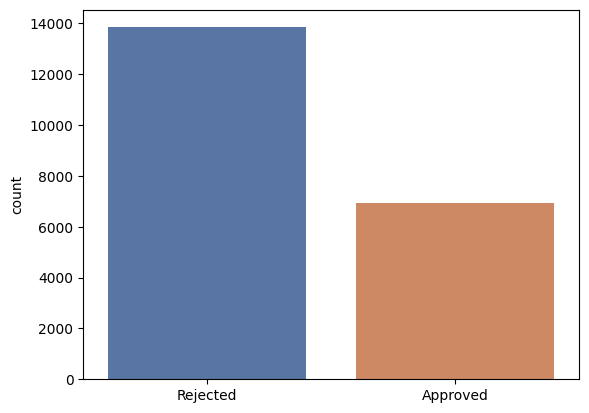

In [60]:
# Check shape of data Before Over Sampling
print('Original dataset shape %s' % Counter(y_train), '- Total Rows:', len(y_train))

# Oversample the minority class using SMOTE
smote = SMOTE(sampling_strategy = 0.5,random_state=1)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

# Check shape of data Atfer Over Sampling
print('Resampled dataset shape %s' % Counter(y_smote), '- Total Rows:', len(y_smote))

# plot distribution for Rejected , Approved
ax = sns.countplot(x = y_smote, palette='deep');
ax.set_xticks(ticks=[0,1]);
ax.set_xticklabels(labels=['Rejected', 'Approved']);

# Data modeling 

## Random Forest

In [61]:
# Create RandomForest Model
rf_model = RandomForestClassifier()
# Train model on the training data
rf_model_fit = rf_model.fit(X_smote, y_smote);

In [62]:
# Make predictions on the testing data
rf_y_pred = rf_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5930
           1       0.84      0.91      0.87      2122

    accuracy                           0.93      8052
   macro avg       0.90      0.92      0.91      8052
weighted avg       0.93      0.93      0.93      8052



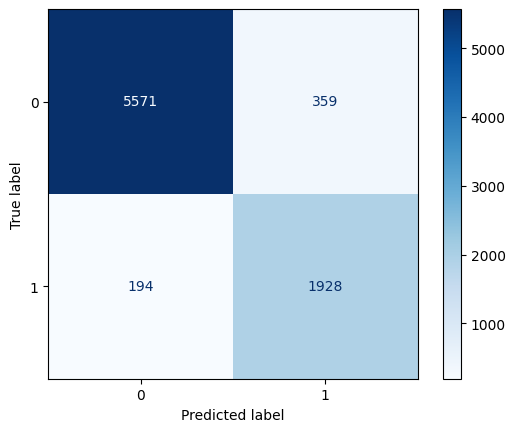

In [63]:
# Evaluate the accuracy of the model
print(classification_report(y_test, rf_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, cmap='Blues')
plt.grid(False)

In [64]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print('Random Forest Accuracy:', rf_accuracy)

Random Forest Accuracy: 0.9313214108296075


In [65]:
rf_fscore = f1_score(y_test, rf_y_pred, average='macro')
print('Random Forest F1 score:', rf_fscore)

Random Forest F1 score: 0.9136447844497015


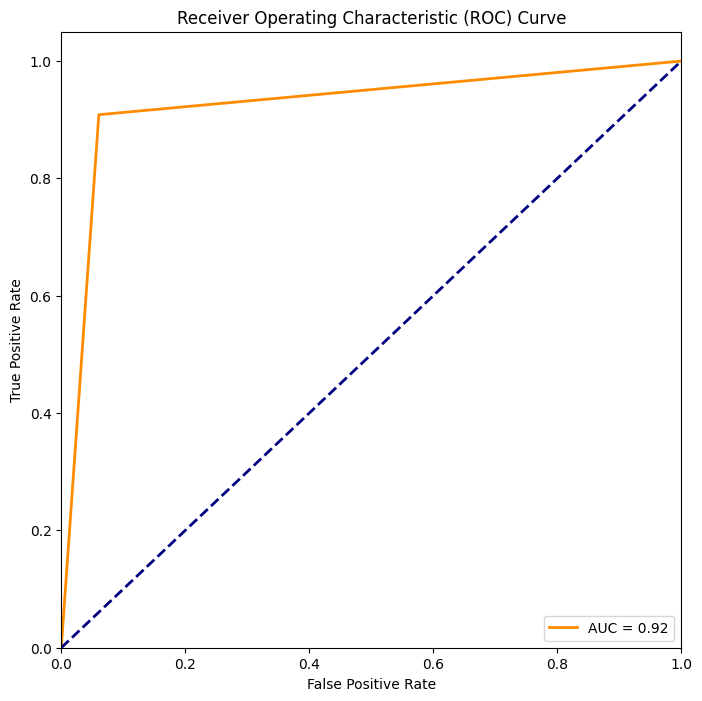

In [66]:
# Get predicted probabilities for positive class
y_prob = rf_model_fit.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf_y_pred)
rf_roc_auc = auc(rf_fpr, rf_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(rf_fpr, rf_tpr, color='darkorange', lw=2, label=f'AUC = {rf_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [67]:
rf_roc_auc = auc(rf_fpr, rf_tpr)
print('Random Forest AUC score:', rf_roc_auc)

Random Forest AUC score: 0.9240185926605242


## Decision Tree 

In [68]:
# Create DecisionTree Model
dt_model = DecisionTreeClassifier()
# Train model on the training data
dt_model_fit = dt_model.fit(X_smote, y_smote);

In [69]:
# Make predictions on the testing data
dt_y_pred = dt_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      5930
           1       0.82      0.82      0.82      2122

    accuracy                           0.90      8052
   macro avg       0.88      0.88      0.88      8052
weighted avg       0.90      0.90      0.90      8052



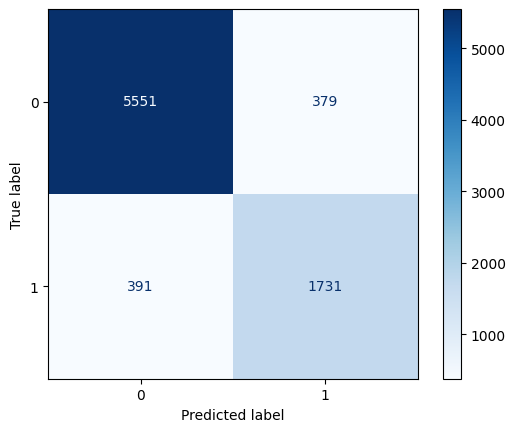

In [70]:
# Evaluate the accuracy of the model
print(classification_report(y_test, dt_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_pred, cmap="Blues");
plt.grid(False)

In [71]:
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print('Decision Tree Accuracy:', dt_accuracy)

Decision Tree Accuracy: 0.9043715846994536


In [72]:
dt_fscore = f1_score(y_test, dt_y_pred, average='macro')
print('Decision Tree F1 score:', dt_fscore)

Decision Tree F1 score: 0.8765972197453364


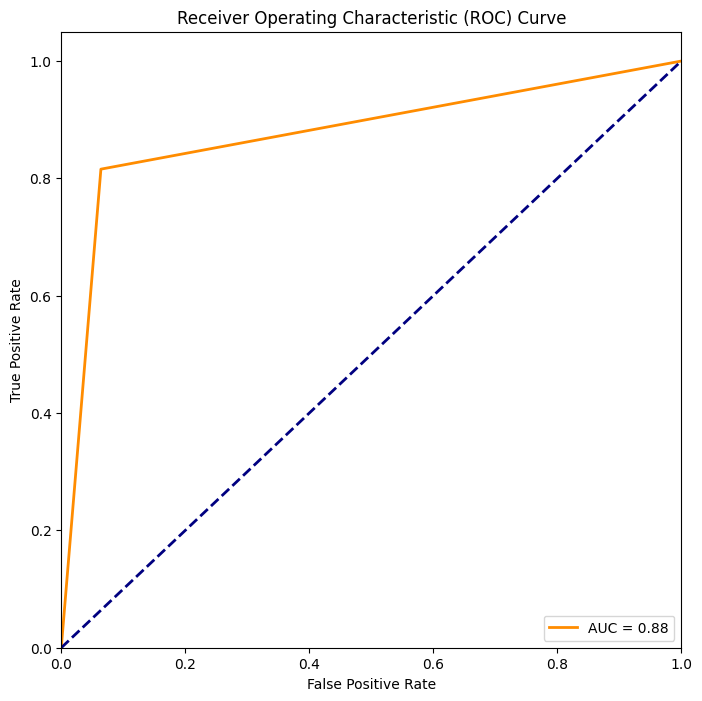

In [73]:
# Get predicted probabilities for positive class
y_prob = dt_model_fit.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt_y_pred)
dt_roc_auc = auc(dt_fpr, dt_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(dt_fpr, dt_tpr, color='darkorange', lw=2, label=f'AUC = {dt_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [74]:
dt_roc_auc = auc(dt_fpr, dt_tpr)
print('Decision Tree AUC score:', dt_roc_auc)

Decision Tree AUC score: 0.8759137788811662


## SVM 

In [75]:
# Create a SVM Model
svm_model = svm.SVC(kernel='linear', probability=True)
# Train Model on the training data
svm_model_fit = svm_model.fit(X_smote, y_smote)

In [76]:
# Make predictions on the testing data
svm_y_pred = svm_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      5930
           1       0.78      0.90      0.83      2122

    accuracy                           0.91      8052
   macro avg       0.87      0.90      0.88      8052
weighted avg       0.91      0.91      0.91      8052



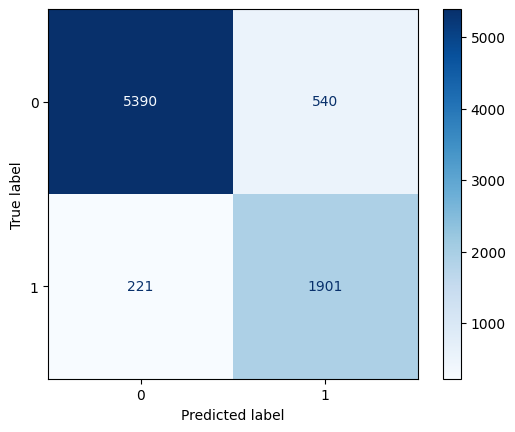

In [77]:
# Evaluate the accuracy of the model
print(classification_report(y_test, svm_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, cmap='Blues');
plt.grid(False);

In [78]:
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print('Svm Accuracy:', svm_accuracy)

Svm Accuracy: 0.9054893194237457


In [79]:
svm_fscore = f1_score(y_test, svm_y_pred, average='macro')
print('Svm F1 score:', svm_fscore)

Svm F1 score: 0.88364246475462


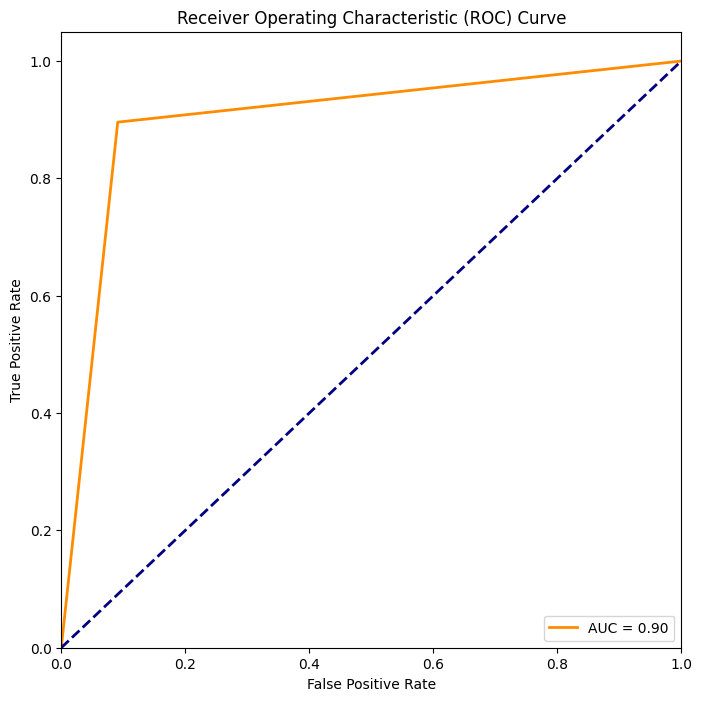

In [80]:
# Get predicted probabilities for positive class
y_prob = svm_model_fit.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm_y_pred)
svm_roc_auc = auc(svm_fpr, svm_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(svm_fpr, svm_tpr, color='darkorange', lw=2, label=f'AUC = {svm_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [81]:
#svm_roc_auc = auc(svm_fpr, svm_tpr)
print('Svm AUC score:', svm_roc_auc)

Svm AUC score: 0.9023952871467784


## KNN

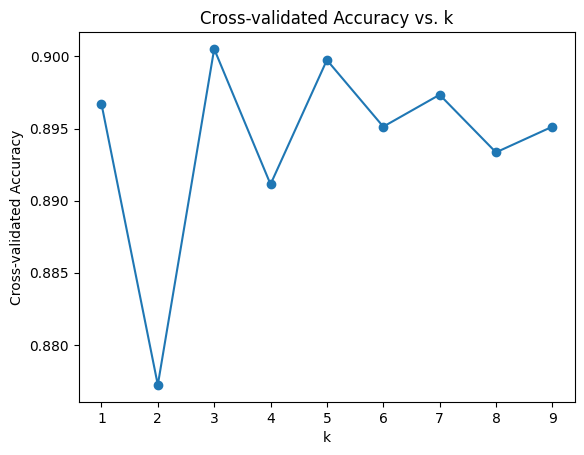

The best value for k is: 3


In [82]:
# Set up a range of k values to test
k_values = list(range(1, 10))

# Initialize an empty list to store cross-validated accuracies for each k
cross_val_accuracies = []

# Perform k-fold cross-validation for each k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
    cross_val_scores = cross_val_score(knn_classifier, X_smote, y_smote, cv=k_fold, scoring='accuracy')
    cross_val_accuracies.append(np.mean(cross_val_scores))

# Find the k with the highest cross-validated accuracy
best_k = k_values[np.argmax(cross_val_accuracies)]

# Plot the results
plt.plot(k_values, cross_val_accuracies, marker='o')
plt.title('Cross-validated Accuracy vs. k')
plt.xlabel('k')
plt.ylabel('Cross-validated Accuracy')
plt.show()

print(f"The best value for k is: {best_k}")

In [83]:
# Create a KNN Model with k=3
Knn_model = KNeighborsClassifier(n_neighbors=3)
# Train model on the training data
Knn_model_fit = Knn_model.fit(X_smote, y_smote)

In [84]:
# Make predictions on the testing data
Knn_y_pred = Knn_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      5930
           1       0.77      0.83      0.80      2122

    accuracy                           0.89      8052
   macro avg       0.85      0.87      0.86      8052
weighted avg       0.89      0.89      0.89      8052



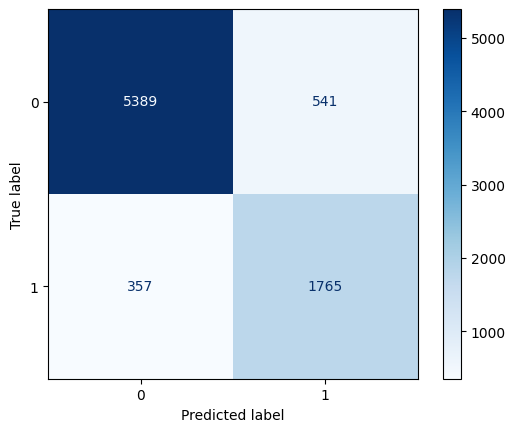

In [85]:
# Evaluate the accuracy of the model
print(classification_report(y_test, Knn_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, Knn_y_pred, cmap='Blues');
plt.grid(False);

In [86]:
Knn_accuracy = accuracy_score(y_test, Knn_y_pred)
print('Knn Accuracy:', Knn_accuracy)

Knn Accuracy: 0.888474913065077


In [87]:
Knn_fscore = f1_score(y_test, Knn_y_pred, average='macro')
print('Knn F1 score:', Knn_fscore)

Knn F1 score: 0.8601448690060727


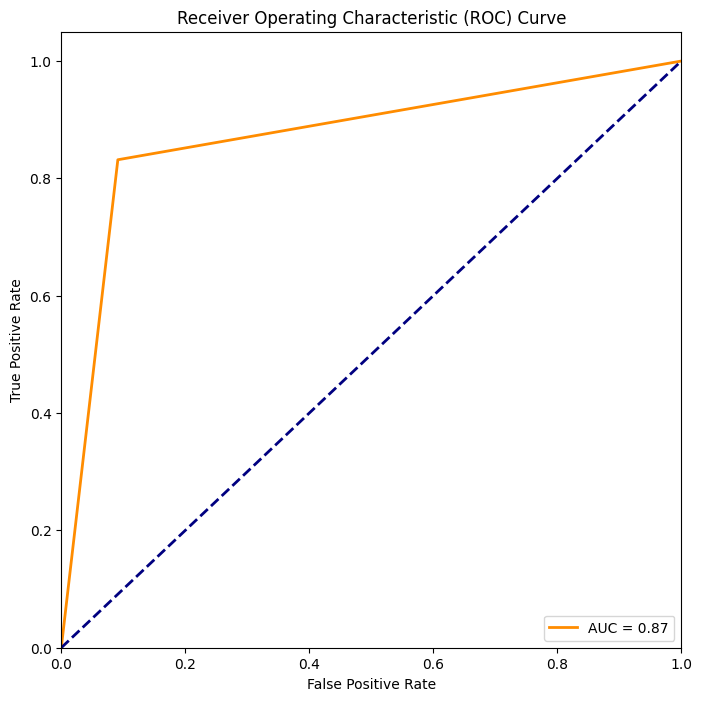

In [88]:
# Get predicted probabilities for positive class
y_prob = Knn_model_fit.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
Knn_fpr, Knn_tpr, thresholds = roc_curve(y_test, Knn_y_pred)
Knn_roc_auc = auc(Knn_fpr, Knn_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(Knn_fpr, Knn_tpr, color='darkorange', lw=2, label=f'AUC = {Knn_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [89]:
Knn_roc_auc = auc(Knn_fpr, Knn_tpr)
print('Knn AUC score:', Knn_roc_auc)

Knn AUC score: 0.8702657297754354


## Logistic Regression

In [90]:
# Create a Logistic Regression model
Lr_model = LogisticRegression()
# Train the model on the training data
Lr_model_fit = Lr_model.fit(X_smote, y_smote)

In [91]:
# Make predictions on the testing data
Lr_y_pred = Lr_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.92      0.94      5930
           1       0.79      0.89      0.84      2122

    accuracy                           0.91      8052
   macro avg       0.88      0.90      0.89      8052
weighted avg       0.92      0.91      0.91      8052



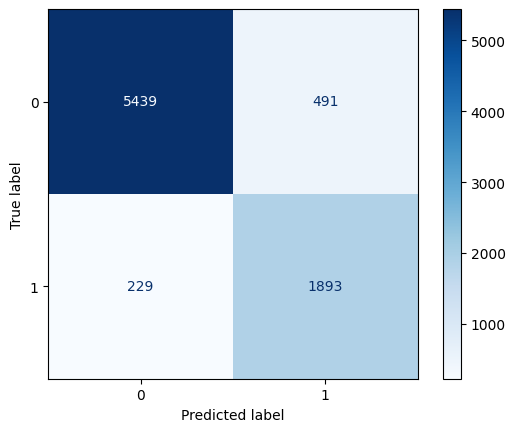

In [92]:
# Evaluate the accuracy of the model
print(classification_report(y_test, Lr_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, Lr_y_pred, cmap='Blues');
plt.grid(False);

In [93]:
Lr_accuracy = accuracy_score(y_test, Lr_y_pred)
print('Logistic Regression Accuracy:', Lr_accuracy)

Logistic Regression Accuracy: 0.910581222056632


In [94]:
Lr_fscore = f1_score(y_test, Lr_y_pred, average='macro')
print('Logistic Regression F1 score:', Lr_fscore)

Logistic Regression F1 score: 0.8890666901796054


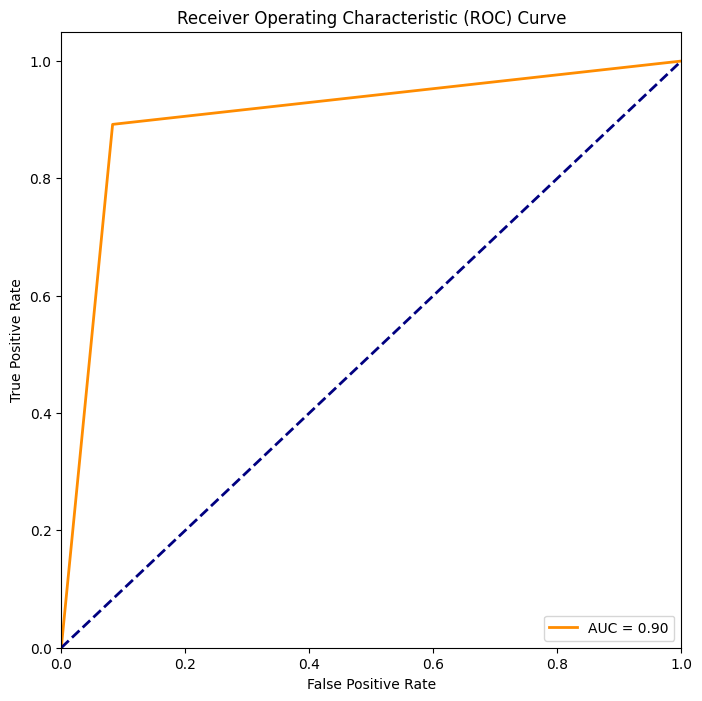

In [95]:
# Get predicted probabilities for positive class
y_prob = Lr_model_fit.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
Lr_fpr, Lr_tpr, thresholds = roc_curve(y_test, Lr_y_pred)
Lr_roc_auc = auc(Lr_fpr, Lr_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(Lr_fpr, Lr_tpr, color='darkorange', lw=2, label=f'AUC = {Lr_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [96]:
Lr_roc_auc = auc(Lr_fpr, Lr_tpr)
print('Logistic Regression AUC score:', Lr_roc_auc)

Logistic Regression AUC score: 0.9046418075791555


## AdaBoost

In [97]:
# Create AdaBoost Model
ada_model = AdaBoostClassifier()
# Train model on the training data
ada_model_fit = ada_model.fit(X_smote, y_smote);

In [98]:
# Make predictions on the testing data
ada_y_pred = ada_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      5930
           1       0.83      0.89      0.86      2122

    accuracy                           0.93      8052
   macro avg       0.90      0.92      0.91      8052
weighted avg       0.93      0.93      0.93      8052



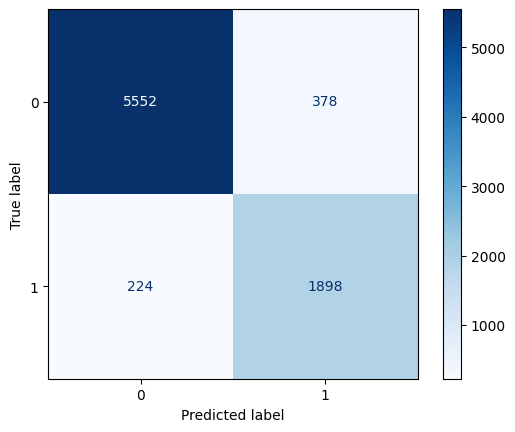

In [99]:
# Evaluate the accuracy of the model
print(classification_report(y_test, ada_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, ada_y_pred, cmap='Blues');
plt.grid(False)

In [100]:
ada_accuracy = accuracy_score(y_test, ada_y_pred)
print('AdaBoost Accuracy:', ada_accuracy)

AdaBoost Accuracy: 0.9252359662195728


In [101]:
ada_fscore = f1_score(y_test, ada_y_pred, average='macro')
print('AdaBoost F1 score:', ada_fscore)

AdaBoost F1 score: 0.9058464904950738


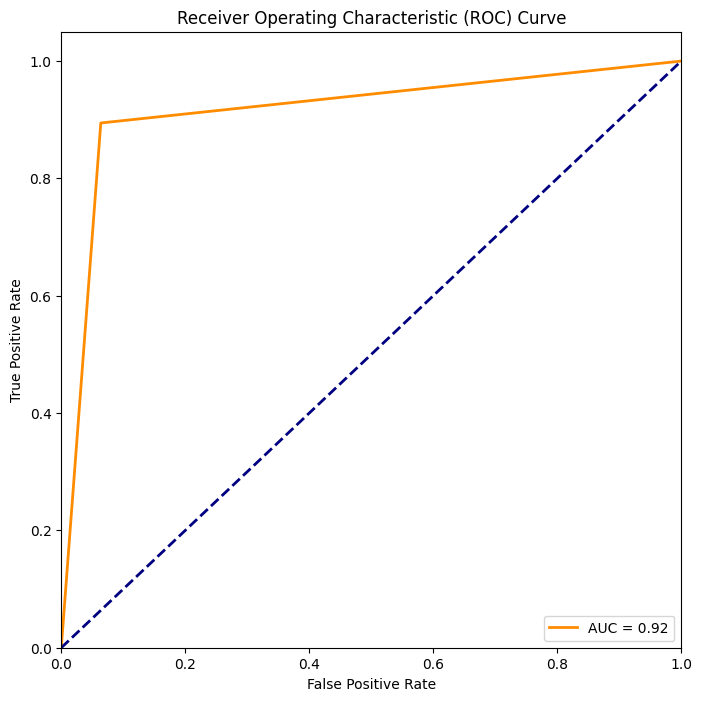

In [102]:
# Get predicted probabilities for positive class
y_prob = ada_model_fit.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
ada_fpr, ada_tpr, thresholds = roc_curve(y_test, ada_y_pred)
ada_roc_auc = auc(ada_fpr, ada_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(ada_fpr, ada_tpr, color='darkorange', lw=2, label=f'AUC = {ada_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [103]:
ada_roc_auc = auc(ada_fpr, ada_tpr)
print('AdaBoost AUC score:', ada_roc_auc)

AdaBoost AUC score: 0.9153477660357328


## XGBoost

In [104]:
# Create an XGBoost Model
xgb_model = XGBClassifier()
# Train the classifier on the training data
xgb_model_fit = xgb_model.fit(X_smote, y_smote)

In [105]:
# Make predictions on the testing data
xgb_y_pred = xgb_model.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      5930
           1       0.84      0.92      0.88      2122

    accuracy                           0.93      8052
   macro avg       0.90      0.93      0.92      8052
weighted avg       0.94      0.93      0.93      8052



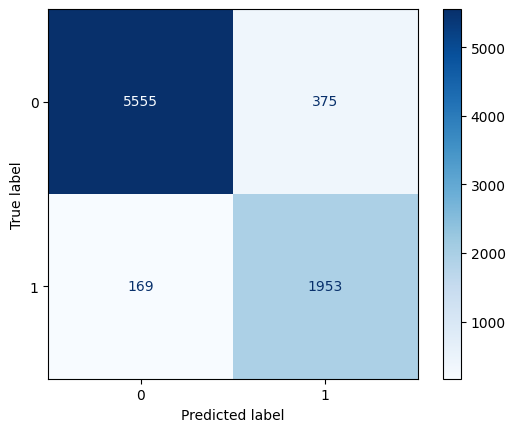

In [106]:
# Evaluate the accuracy of the model
print(classification_report(y_test,xgb_y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, xgb_y_pred, cmap='Blues');
plt.grid(False)

In [107]:
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print('XGBoost Accuracy:', xgb_accuracy)

XGBoost Accuracy: 0.9324391455538996


In [108]:
xgb_fscore = f1_score(y_test, xgb_y_pred, average='macro')
print('XGBoost F1 score:', xgb_fscore)

XGBoost F1 score: 0.9155367786148556


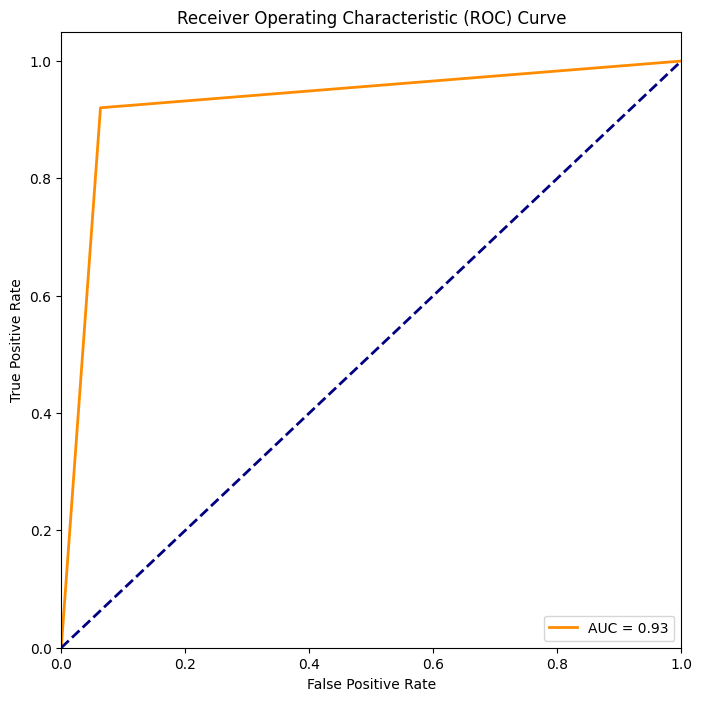

In [109]:
# Get predicted probabilities for positive class
y_prob = xgb_model_fit.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb_y_pred)
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(xgb_fpr, xgb_tpr, color='darkorange', lw=2, label=f'AUC = {xgb_roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [110]:
xgb_roc_auc = auc(xgb_fpr, xgb_tpr)
print('XGBoost AUC score:', xgb_roc_auc)

XGBoost AUC score: 0.9285601893278955


# Models Evaluation

In [111]:
summary = {
    'Models': ['Random Forest', 'Decision Tree', 'KNN', 'Logistic Regression', 'Support Vector Machine', 'AdaBoost', 'XGBoost'],
    'Accuracy': [rf_accuracy, dt_accuracy, Knn_accuracy, Lr_accuracy, svm_accuracy, ada_accuracy, xgb_accuracy],
    'F1 Score': [rf_fscore, dt_fscore, Knn_fscore, Lr_fscore, svm_fscore, ada_fscore, xgb_fscore],
    'AUC Score': [rf_roc_auc, dt_roc_auc, Knn_roc_auc, Lr_roc_auc, svm_roc_auc, ada_roc_auc, xgb_roc_auc]
             }


df_summary = pd.DataFrame(summary, index=range(1, len(summary['Models']) + 1))

df_summary

,Models,Accuracy,F1 Score,AUC Score
1,Random Forest,0.931321,0.913645,0.924019
2,Decision Tree,0.904372,0.876597,0.875914
3,KNN,0.888475,0.860145,0.870266
4,Logistic Regression,0.910581,0.889067,0.904642
5,Support Vector Machine,0.905489,0.883642,0.902395
6,AdaBoost,0.925236,0.905846,0.915348
7,XGBoost,0.932439,0.915537,0.928560


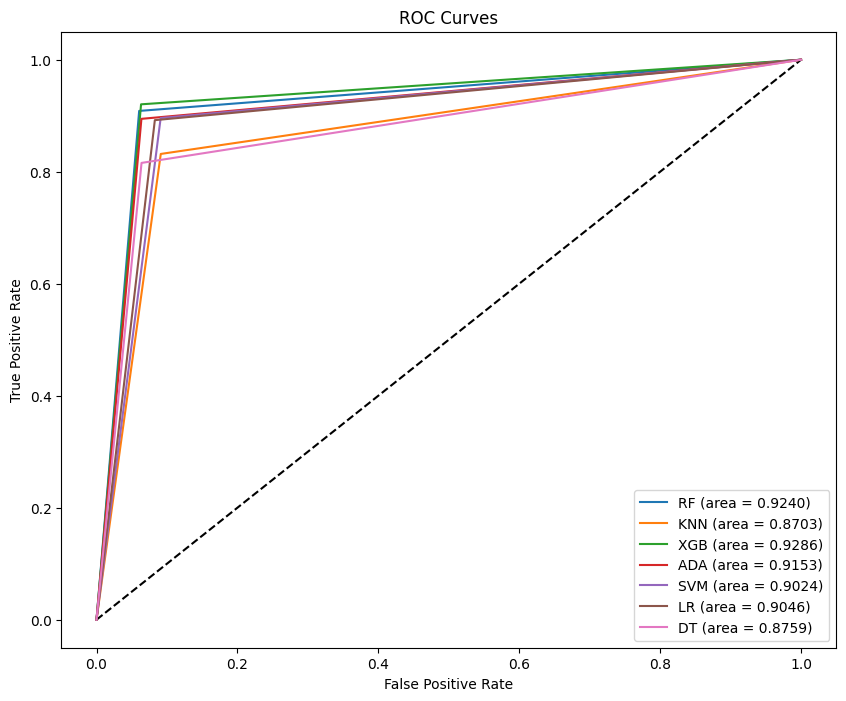

In [112]:
# Plot ROC curve for all models 
plt.figure(figsize=(10,8))

plt.plot([0, 1], [0, 1], "k--")

plt.plot(rf_fpr, rf_tpr, label='RF (area = %0.4f)' % rf_roc_auc)
plt.plot(Knn_fpr, Knn_tpr, label='KNN (area = %0.4f)' % Knn_roc_auc)
plt.plot(xgb_fpr, xgb_tpr, label='XGB (area = %0.4f)' % xgb_roc_auc)
plt.plot(ada_fpr, ada_tpr, label='ADA (area = %0.4f)' % ada_roc_auc)
plt.plot(svm_fpr, svm_tpr, label='SVM (area = %0.4f)' % svm_roc_auc)
plt.plot(Lr_fpr, Lr_tpr, label='LR (area = %0.4f)' % Lr_roc_auc)
plt.plot(dt_fpr, dt_tpr, label='DT (area = %0.4f)' % dt_roc_auc)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curves')
plt.legend(loc="best")

plt.show()

# The Champion Model 

## XGBoost

In [113]:
# Create an XGBoost Model
xgb_model = XGBClassifier()
# Train the classifier on the training data
xgb_model_fit = xgb_model.fit(X_smote, y_smote);

In [114]:
# Make predictions on the testing data
xgb_y_pred = xgb_model.predict(X_test)

In [115]:
# Score loan applicantions with model  
xgb_scoring = xgb_model_fit.predict_proba(X_test)

In [116]:
# Create table for loan applicantions with scores
Scoring_df = pd.DataFrame(xgb_scoring, columns=xgb_model.classes_)

In [117]:
# insert loan_ID onto the table 
Scoring_df.insert(0, 'loan_ID', df['loan_ID'])

In [118]:
# Replace columns name 0 , 1 with Rejected , Approved
Scoring_df.rename(columns={0: 'Rejected', 1: 'Approved'}, inplace=True)
Scoring_df

,loan_ID,Rejected,Approved
0,661771,0.999634,0.000366
1,661772,0.997787,0.002213
2,661773,0.999770,0.000230
3,661774,0.999998,0.000002
4,661778,0.731841,0.268159
...,...,...,...
8047,684854,0.061473,0.938527
8048,684855,0.211192,0.788808
8049,684856,0.031317,0.968683
8050,684857,0.999952,0.000048


In [119]:
# Export table 
Scoring_df.to_csv('Loan scoring with ML.csv', index = False)